In [56]:
# %reset -f
### One needs to first run https://www.kaggle.com/left13/various-nets-densenet121-0-96-acc-full-set
### DenseNet121 N_FFT 256 - 23 EPOCHS - 0.96 ACC ON 20% TEST
from utils import *
import pickle

import os, math
import numpy as np
seed = 2018
np.random.seed(seed)

import librosa
from collections import Counter
from sklearn import manifold
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Input
from keras import Model
from keras import backend as K
from keras.utils import np_utils
from keras.applications.densenet import DenseNet121

import logging
logger = logging.getLogger()
logger.propagate = False
logger.setLevel(logging.ERROR)

In [57]:
valid_features_file = os.path.join(TEMP_DATADIR,'valid_features.dat')
valid_labels_file = os.path.join(TEMP_DATADIR, 'valid_labels.dat')
xtest_names_file = os.path.join(TEMP_DATADIR, 'xtest_names.dat')
ytest_names_file = os.path.join(TEMP_DATADIR, 'ytest_names.dat')
tsne_file = os.path.join(TEMP_DATADIR, 'tsne.dat')
mosquitos_csv_file = os.path.join(TEMP_DATADIR, 'mosquitos.csv')

In [58]:
# XX = pickle.load(open(TEMP_DATADIR + valid_features_file, "rb"))
y = pickle.load(open(valid_labels_file, "rb"))

In [59]:
# tsne = manifold.TSNE(n_components = 2, perplexity = 30, init='pca',random_state = seed, verbose = 1)
# X = tsne.fit_transform(np.vstack(XX))
# pickle.dump(X, open(TEMP_DATADIR + 'tsne.dat', "wb"))

X = pickle.load(open(tsne_file, "rb"))

In [60]:
x_min, x_max = np.min(X, 0), np.max(X, 0)
X = (X - x_min) / (x_max - x_min)

In [329]:
def plot_tsne(y_label, y_color, dimX=10, dimY=8):
    fig = plt.figure(figsize = (dimX, dimY))
    ax = fig.gca()

    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1], str(y_label[i]), color = plt.cm.tab20(y_color[i]), fontdict = {'weight': 'bold', 'size': 9})

    fig.suptitle('0: Ae. aegypti, 1: Ae. albopictus, 2: An. gambiae, 3: An. arabiensis, 4: C. pipiens, 5: C. quinquefasciatus')

    plt.show()

In [62]:
X_names = pickle.load(open(xtest_names_file, "rb"))
y_names = pickle.load(open(ytest_names_file, "rb"))

In [63]:
df = pd.read_csv(mosquitos_csv_file, delimiter=';', index_col=0)
#df['fname'] = df['index']
#df.drop('index',axis=1,inplace=True)
df.sample(4)

,fname,pow0,pow1,pow2,fr0,fr1,fr2,damping_0,damping_1,damping_2,names,pathlen,fnamelen,temp,humd,label
176465,F170214_224511_028_G_050_T_25.9_H_71.1,0.124836,0.102571,0.016339,644.531250,1306.640625,1957.031250,0.038636,0.019058,0.014970,/home/kalfasyan/data/insects/Wingbeats/C. pipi...,10,9,25.9,71.1,C. pipiens
84168,F170207_120954_192_G_050,0.171112,0.029992,0.001557,650.390625,1301.757812,1954.101562,0.033784,0.019505,0.016492,/home/kalfasyan/data/insects/Wingbeats/Ae. aeg...,9,5,NaN,NaN,Ae. aegypti
89796,F170228_141456_004_G_050_T_25.9_H_61.4,0.112485,0.078215,0.030090,501.953125,1008.789062,1508.789062,0.045720,0.023717,0.016181,/home/kalfasyan/data/insects/Wingbeats/Ae. alb...,9,9,25.9,61.4,Ae. albopictus
22566,F170206_202503_020_G_050,0.045689,0.139331,0.010273,563.476562,1108.398438,1663.085938,0.043328,0.028634,0.008808,/home/kalfasyan/data/insects/Wingbeats/Ae. aeg...,9,5,NaN,NaN,Ae. aegypti


In [68]:
set_X_names = set(X_names)
idx_xnames = df.names.apply(lambda x: X_names[X_names.index(x)] if x in set_X_names else np.nan)
idx_y = df.names.apply(lambda x: y_names[X_names.index(x)] if x in set_X_names else np.nan)
df['idx_xnames'] = idx_xnames
df['idx_y'] = idx_y

df = df[~df.idx_xnames.isnull()]
df['X0'] = X[:,0]
df['X1'] = X[:,1]
df['date'] = df['fname'].apply(lambda x: pd.to_datetime(x.split('_')[0] + x.split('_')[1], format='F%y%m%d%H%M%S'))
df['date_days'] = df.date.dt.dayofyear#to_period('d').apply(lambda x: x.strftime('%Y%m%d'))
df['date_hours'] = df.date.dt.hour

# Original

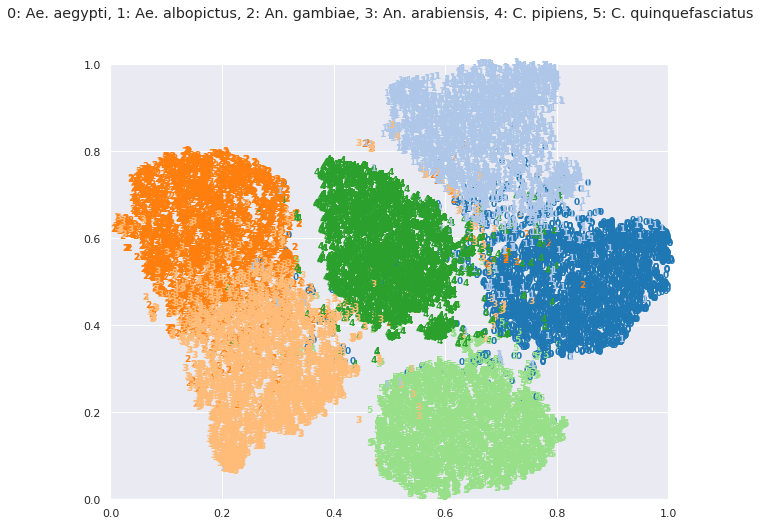

In [330]:
# %matplotlib widget

plot_tsne(y_label=y, y_color=y)

## Day of the year

In [331]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
lb.fit(df.date_days)
y_day = lb.transform(df.date_days)
pd.Series(y_day).value_counts()

50    2179
49    1681
36    1577
35    1367
27     766
26     763
23     700
22     689
28     686
8      637
24     596
10     557
20     543
15     536
9      529
21     521
29     485
25     481
16     473
14     438
5      433
7      423
6      411
30     396
1      387
34     380
18     361
17     339
11     315
13     305
31     288
32     259
38     258
4      244
39     232
41     210
2      188
19     155
40     150
0      149
42     143
46     139
12     131
45     124
3      123
43      95
44      78
48      76
37      64
33      63
47      37
dtype: int64

In [332]:
np.unique(y_day)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

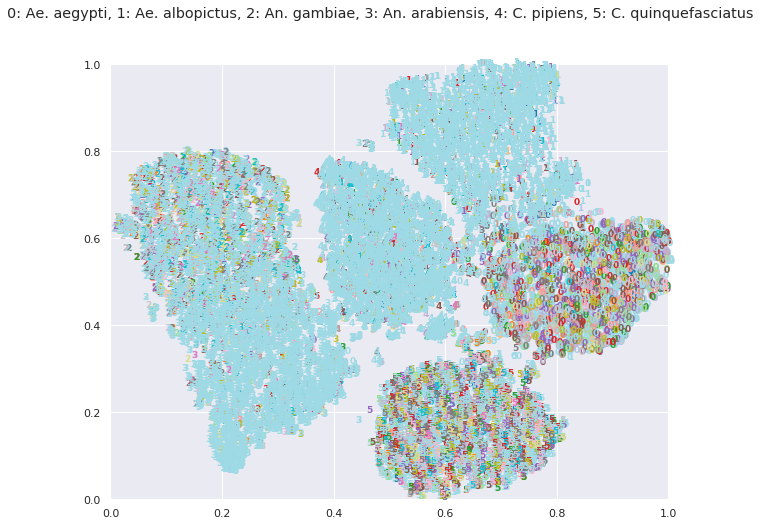

In [333]:
plot_tsne(y_color=y_day, y_label=y)

## Hour of the day

In [334]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
lb.fit(df.date_hours)
y_hour = lb.transform(df.date_hours)
pd.Series(y_hour).value_counts()

11    2543
23    1566
12    1462
19    1377
17    1366
20    1347
15    1344
16    1342
14    1332
18    1265
21    1160
13    1004
22     826
0      611
1      607
10     578
9      561
3      548
2      543
4      460
8      384
5      354
6      321
7      259
dtype: int64

In [335]:
(df.date_hours>=23).sum()

1566

In [336]:
y_specific_hour = list((df.date_hours >= 21 ) | (df.date_hours <= 6).tolist())

pd.Series(y_specific_hour).value_counts()

False    16164
True      6996
dtype: int64

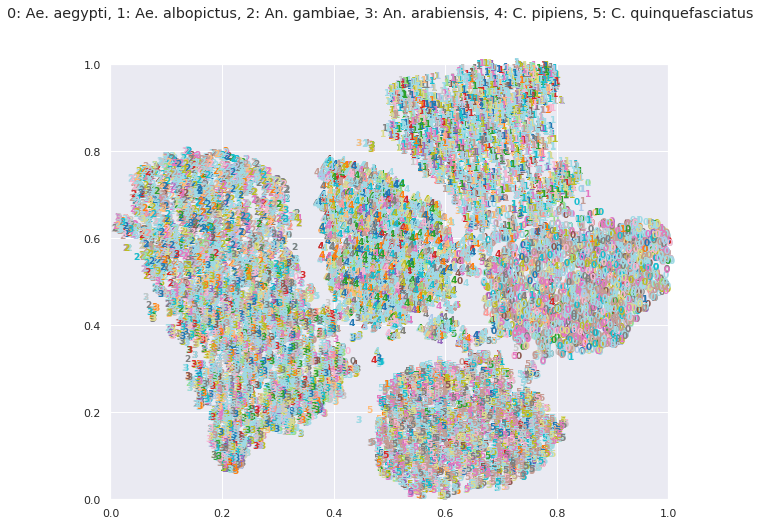

In [344]:
plot_tsne(y_color=y_hour, y_label=y)

## Month

In [338]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
lb.fit(df.date.dt.to_period('m'))

LabelEncoder()

In [339]:
y_month = list(lb.transform(df.date.dt.to_period('m')))

In [340]:
df.date.dt.to_period('m').value_counts()

2017-02    11285
2017-01     4832
2016-12     4236
2017-03     2807
Freq: M, Name: date, dtype: int64

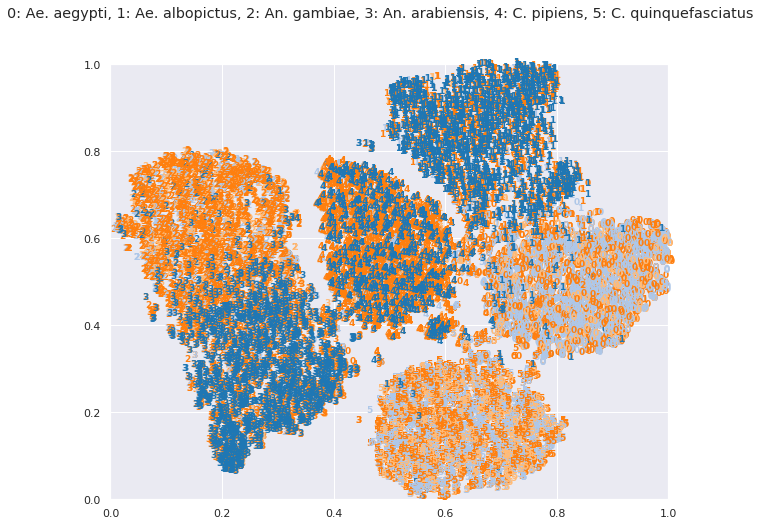

In [341]:
plot_tsne(y_color=y_month, y_label=y)

## Fundamental Frequency (threshold)

In [342]:
y_fr0 = (df.fr0 > 550).tolist()
pd.Series(y_fr0).value_counts()

True     14143
False     9017
dtype: int64

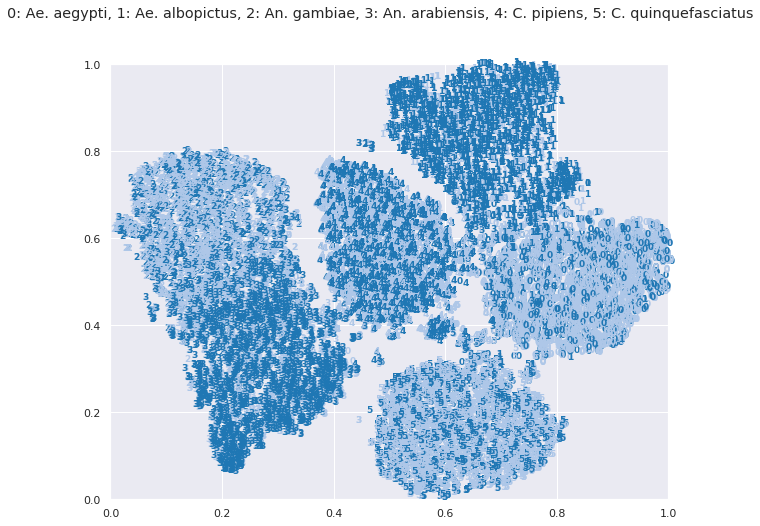

In [343]:
plot_tsne(y_color=y_fr0, y_label=y)

# **Selection from t-sne map**.

In [79]:
selection = (df['X0'] > 0.545) & (df['X0'] < 0.616) & (df['X1'] > 0.35) & (df['X1'] < 0.427)

xx = -0.12; yy = 0.18
selection2 = (df['X0'] > 0.545 + xx) & (df['X0'] < 0.616 + xx) & (df['X1'] > 0.35 + yy) & (df['X1'] < 0.427 + yy)

#small cluster mid
#(df['X0'] > 0.545) & (df['X0'] < 0.616) & (df['X1'] > 0.35) & (df['X1'] < 0.427)
#(df['X0'] > 0.05) & (df['X0'] < 0.36) & (df['X1'] > 0.05) & (df['X1'] < 0.8)

y_x0 = (selection).tolist()
y_x02 = (selection2).tolist()

## Selection 1

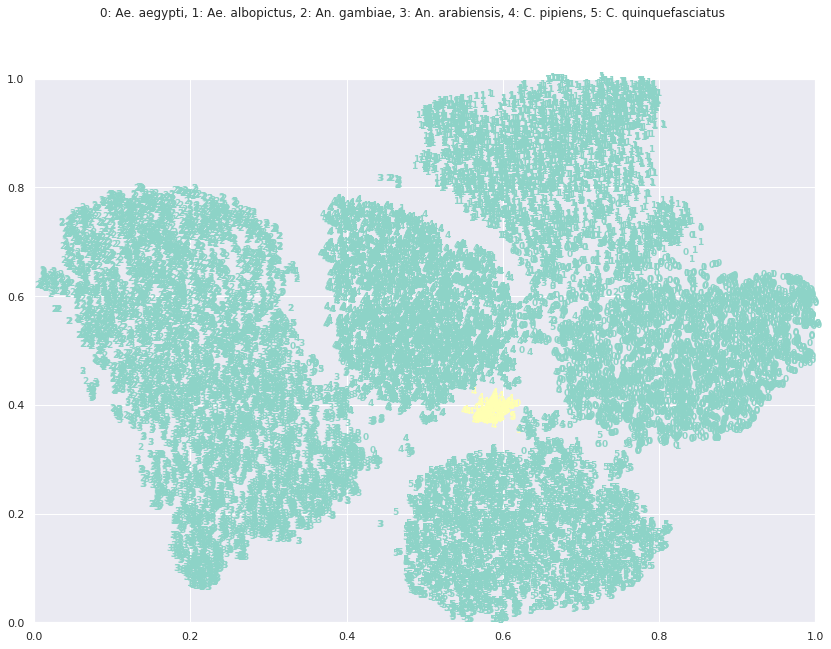

In [21]:
# %matplotlib inline
#widget
plot_tsne(y_color=y_x0, y_label=y, dimX=14, dimY=10)

## Selection 2

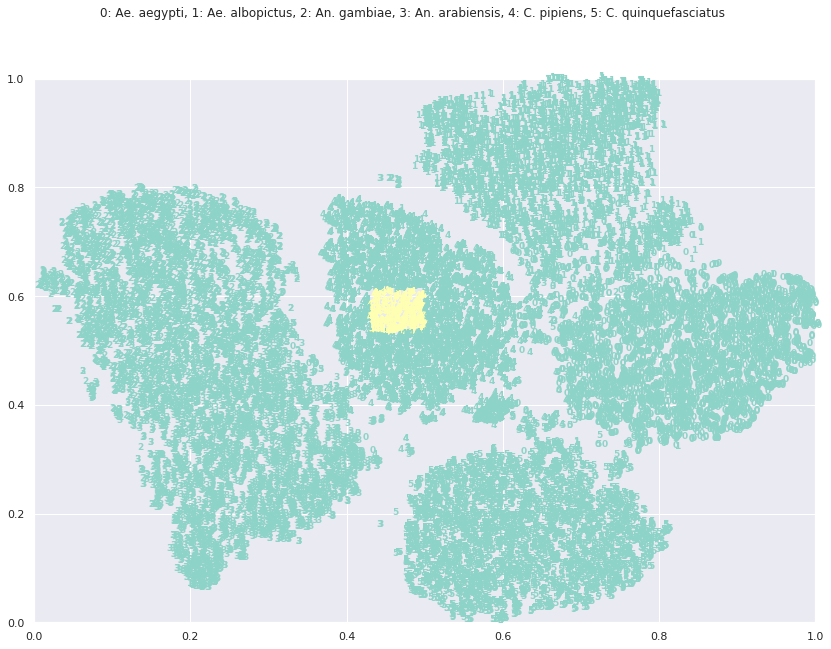

In [22]:
plot_tsne(y_color=y_x02, y_label=y, dimX=14, dimY=10)

# Analysis of "selection"

### What kind of insect classes are there

In [80]:
# selection = selection2

In [81]:
df[selection].idx_y.value_counts()

4    73
3    31
5    27
0    24
2    17
1    17
Name: idx_y, dtype: int64

In [322]:
from wavhandler import read_simple
X_sel, X_sel_names = read_simple(df[selection].names)
pd.Series(X_sel_names).apply(lambda x: x.split('/')[6]).value_counts()

C. pipiens             73
An. arabiensis         31
C. quinquefasciatus    27
Ae. aegypti            24
Ae. albopictus         17
An. gambiae            17
dtype: int64

### Random signal plot from selection

Text(0.5, 1.0, 'C. quinquefasciatus')

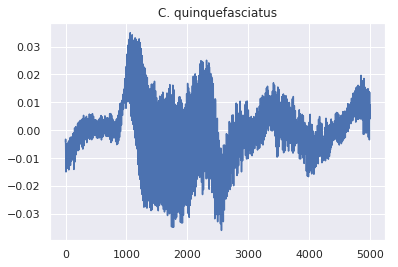

In [324]:
rdm = np.random.randint(0,188)
plt.figure()
plt.plot(X_sel[:,rdm])
plt.title(X_sel_names[rdm].split('/')[6])

### Histograms of signals collected per day for selection

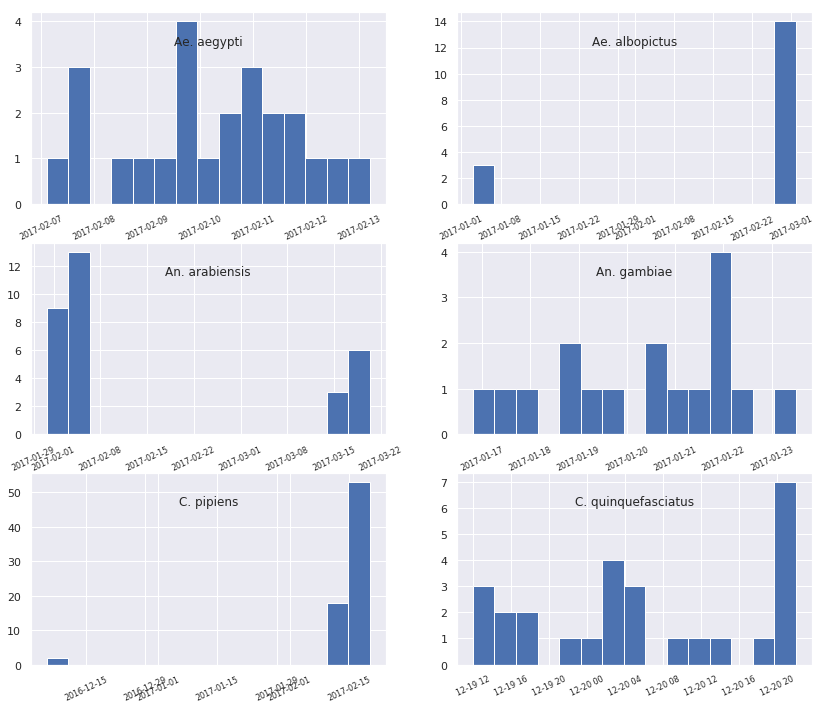

In [84]:
plt.figure(figsize=(14,12))
plt.tight_layout()
for i, (date,sub) in enumerate(df[selection][['label', 'date']].sort_values(by='label').groupby('label')):
    plt.subplot(3,2,i+1)
    sub.date.hist(bins=15, xrot=25, xlabelsize=8)
#     plt.ylim(0,20)
    plt.title(sub.label.unique().tolist()[0], y=0.8)

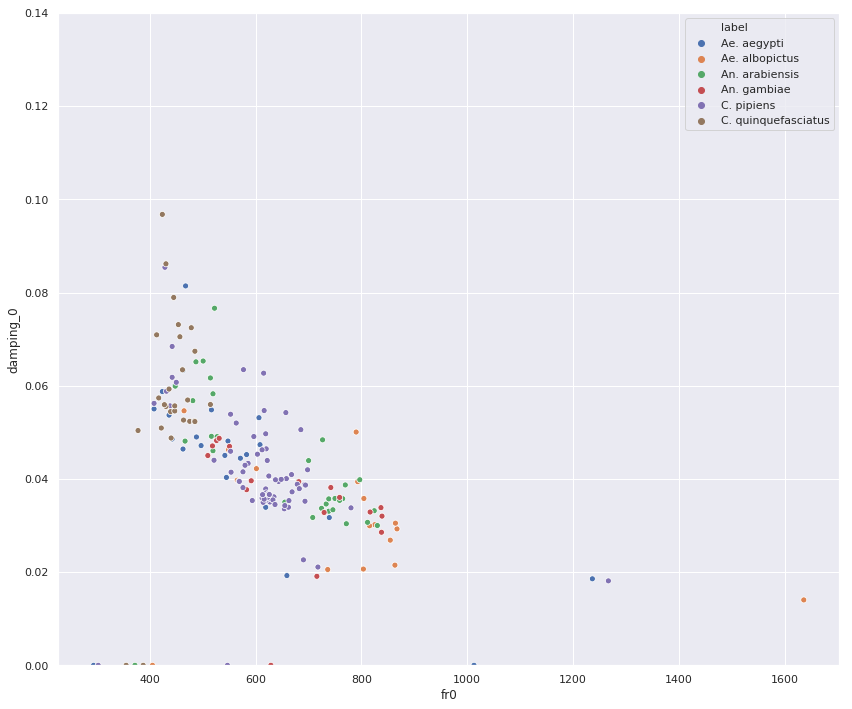

In [85]:
df['selection'] = selection
sub = df[selection][['label', 'fr0', 'damping_0', 'pow0', 'date_days', 'selection']].sort_values(by='label')

plt.figure(figsize=(14,12))
plt.ylim(0,0.14)
sns.scatterplot(data=sub, x='fr0', y='damping_0', 
                 hue='label', alpha=1.)#, palette=sns.color_palette("cubehelix"))

## PCA on selection

In [48]:
def perform_pca_on_matrix(X, y, daily_data=False):
#     idx = np.random.randint(X.shape[0], size=3000)
#     X = X[idx,:]
#     labelarray = y[idx]
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    X_std = StandardScaler(with_std=False).fit_transform(X);  # standardization of data
    if daily_data:
        y = pd.Series(y).apply(lambda x: periods.index(x))
    ncomps = 2
    pca = PCA(n_components=ncomps) # 10 to get 80% explained variance
    Χ_final = pca.fit_transform(X_std)
    print("EXPLAINED VARIANCE with {0:d} components: {1:.2f}".format(ncomps,pca.explained_variance_ratio_.sum()) )

    sns.scatterplot(Χ_final[:,0], Χ_final[:,1], alpha=0.6, hue=y, legend='full')#, palette=sns.color_palette("cubehelix"))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    
    df_pca = pd.DataFrame(pca.components_,index = ['PC-1','PC-2'])#, 'PC-3'])
    return df_pca

In [49]:
X = read_simple(df.names)[0]

EXPLAINED VARIANCE with 2 components: 0.16


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
PC-1,-0.002338,-0.002007,-0.002886,-0.002737,-0.002677,-0.002054,-0.001625,-0.001944,-0.001856,-0.001431,...,-0.001040,-0.000131,-0.000209,-0.001507,-0.001254,0.000443,0.000187,-0.001686,-0.002292,-0.000901
PC-2,0.000957,0.000560,-0.000464,-0.001199,0.000181,0.001436,0.001972,0.000460,-0.001248,-0.000687,...,-0.001876,0.000874,0.000425,-0.001498,-0.003588,-0.003874,-0.003819,-0.003745,-0.006839,-0.008096


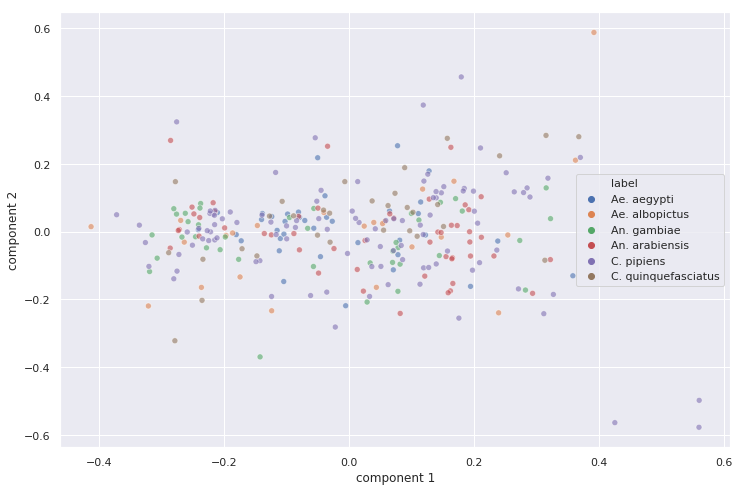

In [50]:
plt.figure(figsize=(12,8))
perform_pca_on_matrix(X_sel.T, df[selection]['label'])

# Comparison of 2 selections

In [144]:
df_sel = df[selection]
df_sel2 = df[selection2]

In [145]:
sel_pip = df_sel[df_sel.label=='C. pipiens'].drop(['pathlen', 'fnamelen','idx_y', 'X0','X1','selection'], axis=1)
sel_pip.describe()

,pow0,pow1,pow2,fr0,fr1,fr2,damping_0,damping_1,damping_2,temp,humd,date_days,date_hours
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,71.000000,71.000000,73.000000,73.000000
mean,0.113195,0.080794,0.009844,612.826413,1224.154538,1834.345569,0.041029,0.021667,0.013516,25.761972,67.435211,54.575342,15.547945
std,0.039941,0.046770,0.013194,111.448356,220.614650,324.535353,0.012785,0.007168,0.006083,0.304427,6.306258,48.271776,7.100550
min,0.000102,0.000039,0.000001,302.734375,710.937500,1212.890625,0.000000,0.000000,0.000000,24.500000,47.200000,44.000000,1.000000
25%,0.088688,0.036302,0.002823,577.148438,1159.179688,1735.351562,0.035658,0.018592,0.009564,25.900000,63.800000,45.000000,14.000000
50%,0.121873,0.079462,0.005412,620.117188,1238.281250,1854.492188,0.038787,0.021094,0.013675,25.900000,67.700000,46.000000,18.000000
75%,0.143276,0.113321,0.012869,654.296875,1296.875000,1939.453125,0.045936,0.025226,0.017393,25.900000,72.100000,48.000000,21.000000
max,0.168138,0.167906,0.098735,1266.601562,2531.250000,3775.390625,0.085421,0.042051,0.027972,25.900000,77.500000,340.000000,23.000000


In [146]:
sel2_pip = df_sel2[df_sel2.label=='C. pipiens'].drop(['pathlen', 'fnamelen','idx_y', 'X0','X1','selection'], axis=1)
sel2_pip.describe()

,pow0,pow1,pow2,fr0,fr1,fr2,damping_0,damping_1,damping_2,temp,humd,date_days,date_hours
count,103.000000,103.000000,1.030000e+02,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,93.000000,93.000000,103.000000,103.000000
mean,0.107698,0.075342,6.836317e-03,602.823498,1204.442885,1808.375683,0.040441,0.020475,0.011673,25.681720,66.769892,74.990291,13.660194
std,0.047288,0.050605,6.435268e-03,129.717329,255.343778,379.988579,0.014133,0.009191,0.006995,0.326026,7.378609,87.506918,7.611335
min,0.000023,0.000013,1.318012e-07,279.296875,687.500000,954.101562,0.000000,0.000000,0.000000,25.200000,43.800000,44.000000,0.000000
25%,0.077884,0.028047,2.322170e-03,570.800781,1136.718750,1709.960938,0.035935,0.018267,0.007688,25.200000,63.300000,45.000000,6.500000
50%,0.121036,0.072649,5.052571e-03,610.351562,1210.937500,1834.960938,0.038523,0.020614,0.013347,25.900000,67.700000,46.000000,17.000000
75%,0.145796,0.123038,9.440997e-03,646.484375,1287.109375,1922.851562,0.046515,0.026426,0.016198,25.900000,71.600000,48.500000,20.000000
max,0.172302,0.162040,3.277345e-02,1330.078125,2654.296875,3920.898438,0.090805,0.042491,0.024892,25.900000,79.400000,341.000000,23.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe874c730f0>,
      dtype=object)

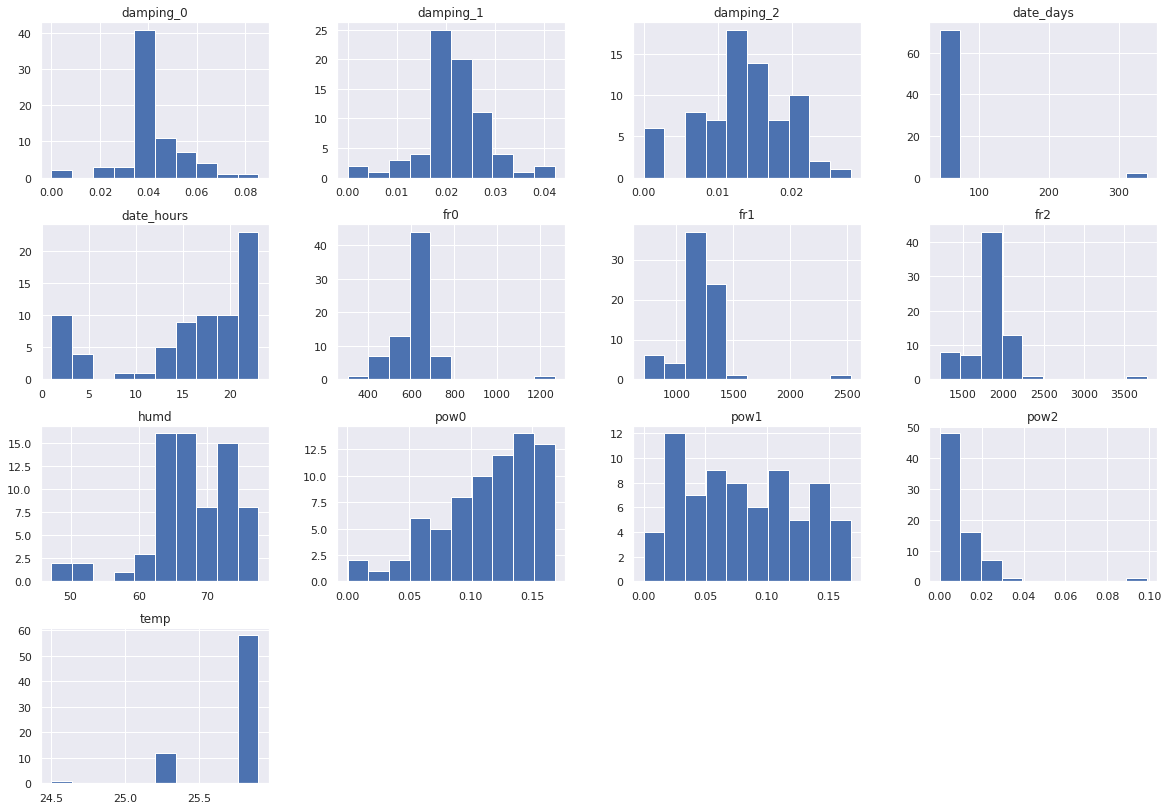

In [147]:
sel_pip.hist(figsize=(20,14))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe885061860>,
      dtype=object)

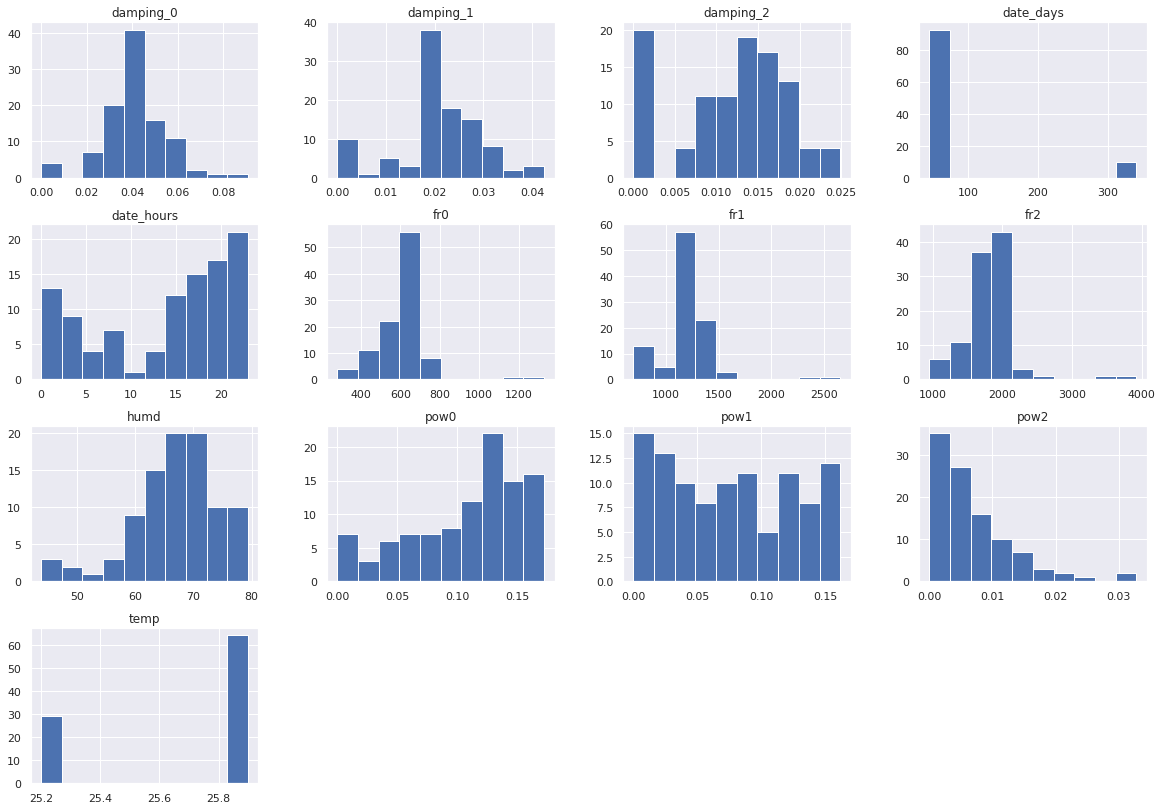

In [148]:
sel2_pip.hist(figsize=(20,14))

## Distance matrices

In [345]:
def upper_triangular(a, metric='cosine'):
    from scipy.spatial.distance import pdist, squareform
    dist_mat = squareform(pdist(a.T, metric=metric))
    up_tr = dist_mat[np.triu_indices(len(dist_mat))]
    return up_tr, dist_mat

In [346]:
from wavhandler import transform_data

Xsel, X_sel_names = read_simple(sel_pip.names)
Xsel2, X_sel2_names = read_simple(sel2_pip.names)

Xsel = transform_data(Xsel.T)
Xsel2 = transform_data(Xsel2.T)

100%|██████████| 103/103 [00:00<00:00, 1566.80it/s]


In [379]:
mtr = 'euclidean'
idx = np.random.randint(0, Xsel2.shape[0], size=Xsel.shape[0])
np.corrcoef(upper_triangular(Xsel, metric=mtr)[0], upper_triangular(Xsel2[idx,:], metric=mtr)[0])

array([[1.        , 0.95845405],
       [0.95845405, 1.        ]])

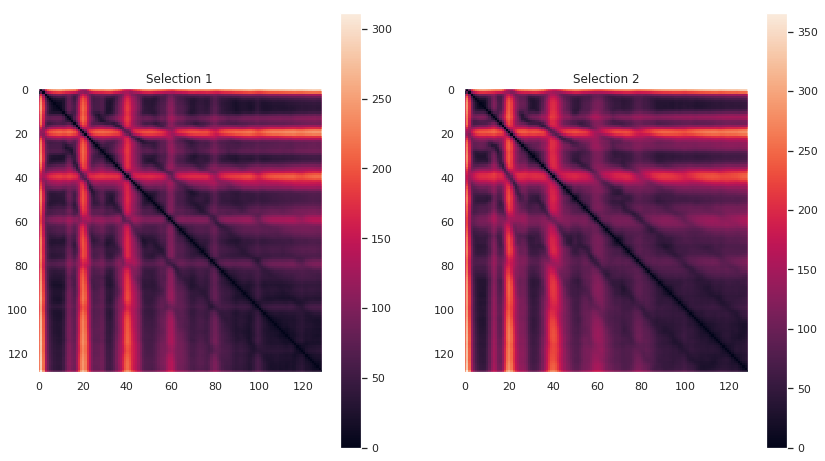

In [380]:
plt.figure(figsize=(14,8)); plt.tight_layout();
plt.subplot(1,2,1); plt.title('Selection 1')
plt.imshow(upper_triangular(Xsel, metric=mtr)[1])
plt.colorbar()
plt.grid(False)
plt.subplot(1,2,2); plt.title('Selection 2')
plt.imshow(upper_triangular(Xsel2, metric=mtr)[1])
plt.colorbar()
plt.grid(False)

## Varriability within classes

In [382]:
df[df.label == 'C. pipiens'].describe()

,pow0,pow1,pow2,fr0,fr1,fr2,damping_0,damping_1,damping_2,pathlen,fnamelen,temp,humd,idx_y,X0,X1,date_days,date_hours
count,3859.000000,3855.000000,3.844000e+03,3859.000000,3855.000000,3844.000000,3859.000000,3855.000000,3844.000000,3860.000000,3860.000000,3597.000000,3597.000000,3860.0,3860.000000,3860.000000,3860.000000,3860.000000
mean,0.104715,0.076705,8.281881e-03,620.385685,1247.229400,1864.489759,0.038021,0.019933,0.012467,9.931865,8.727461,25.729135,67.329552,4.0,0.426456,0.573308,66.434974,13.559845
std,0.050021,0.049410,9.596236e-03,138.306241,270.898364,390.878306,0.014239,0.007697,0.006701,0.252010,1.008038,0.305669,6.559226,0.0,0.196965,0.210168,74.147851,7.637030
min,0.000006,0.000009,4.209006e-08,269.531250,623.046875,954.101562,0.000000,0.000000,0.000000,9.000000,5.000000,24.500000,39.400000,4.0,0.006986,0.060680,44.000000,0.000000
25%,0.068212,0.034302,2.401124e-03,576.171875,1168.945312,1750.732422,0.034639,0.017814,0.008633,10.000000,9.000000,25.900000,63.800000,4.0,0.249757,0.429307,45.000000,5.000000
50%,0.114516,0.072422,5.331025e-03,620.117188,1242.187500,1862.304688,0.037943,0.020032,0.013663,10.000000,9.000000,25.900000,67.700000,4.0,0.441708,0.578740,46.000000,16.000000
75%,0.147564,0.120878,1.096708e-02,651.367188,1303.710938,1954.101562,0.044093,0.023984,0.016761,10.000000,9.000000,25.900000,72.100000,4.0,0.573960,0.722824,48.000000,20.000000
max,0.175292,0.170948,1.549118e-01,1473.632812,2907.226562,3999.023438,0.108295,0.056760,0.038688,10.000000,9.000000,25.900000,80.400000,4.0,0.969625,0.997288,341.000000,23.000000


In [383]:
df[df.label == 'C. quinquefasciatus'].describe()

,pow0,pow1,pow2,fr0,fr1,fr2,damping_0,damping_1,damping_2,pathlen,fnamelen,temp,humd,idx_y,X0,X1,date_days,date_hours
count,3860.000000,3855.000000,3850.000000,3860.000000,3855.000000,3850.000000,3860.000000,3855.000000,3850.000000,3860.0,3860.0,0.0,0.0,3860.0,3860.000000,3860.000000,3860.000000,3860.000000
mean,0.099240,0.077364,0.006659,460.238221,919.851198,1374.994420,0.054545,0.027226,0.015982,9.0,5.0,NaN,NaN,5.0,0.470084,0.564260,354.564508,13.583161
std,0.040753,0.044261,0.007660,85.186284,167.863144,240.554918,0.016951,0.010240,0.008748,0.0,0.0,NaN,NaN,0.0,0.200708,0.268760,0.495886,6.770749
min,0.000009,0.000009,0.000013,237.304688,583.984375,886.718750,0.000000,0.000000,0.000000,9.0,5.0,NaN,NaN,5.0,0.008372,0.060100,354.000000,0.000000
25%,0.072905,0.041741,0.002542,428.710938,852.539062,1276.367188,0.048491,0.020011,0.011119,9.0,5.0,NaN,NaN,5.0,0.283948,0.319630,354.000000,9.000000
50%,0.104040,0.078063,0.004890,450.195312,896.484375,1339.843750,0.055441,0.028403,0.016351,9.0,5.0,NaN,NaN,5.0,0.492614,0.568145,355.000000,15.000000
75%,0.130635,0.113495,0.008376,469.970703,936.035156,1398.437500,0.063859,0.033934,0.022285,9.0,5.0,NaN,NaN,5.0,0.647739,0.812290,355.000000,19.000000
max,0.176049,0.171406,0.137909,1550.781250,3099.609375,3116.210938,0.136000,0.057339,0.039596,9.0,5.0,NaN,NaN,5.0,0.980612,1.000000,355.000000,23.000000
